Question 1:
● Using the given MT cars dataset you need to find outlier with z score.

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
import os
os.chdir("D:\Letsupgrade\Statistic notes\Stats Assignment")
mt=pd.read_csv("mtcars.csv")

In [28]:
mt.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [29]:
mt.shape

(32, 12)

C:\Users\abhis\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\abhis\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\abhis\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\abhis\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


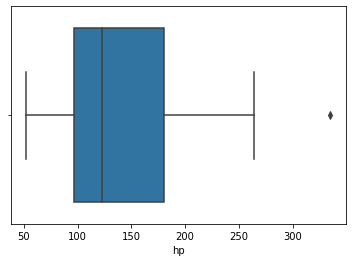

In [30]:
import seaborn as sns
sns.boxplot(data=mt,x=mt['hp'])

In [42]:
outliers=[]
def detect_outliers(data):
    
    threshold =3
    mean =np.mean(data)
    std =np.std(data)
    
    for i in data:
        z_score = (i - mean)/std
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers


In [49]:
outliers_pt=detect_outliers(mt.hp)

In [44]:
outliers_pt

[]

In [47]:
from scipy import stats
z=np.abs(stats.zscore(mt.hp))
print(z)

[0.54365487 0.54365487 0.7955699  0.54365487 0.41954967 0.61774753
 1.45684686 1.25494437 0.76593284 0.35101396 0.35101396 0.49364233
 0.49364233 0.49364233 0.86410561 1.01229092 1.23456889 1.19567025
 1.40312969 1.21048878 0.73629578 0.04908639 0.04908639 1.45684686
 0.41954967 1.19567025 0.82520696 0.49919927 1.73839896 0.41954967
 2.79051468 0.5584734 ]


In [48]:
print(np.where(z>3))

(array([], dtype=int64),)


Question 2:
● Using the Boston data set from sklearn, find out the Outlier and treat them.

In [67]:
from sklearn import neighbors,datasets,preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

In [68]:
boston = datasets.load_boston()

In [69]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [70]:
from scipy import stats
z=np.abs(stats.zscore(boston.target))
print(z)

[0.15968566 0.10152429 1.32424667 1.18275795 1.48750288 0.6712218
 0.03996443 0.49708184 0.65659542 0.39538548 0.81985164 0.39538548
 0.09064054 0.23212926 0.47157171 0.286548   0.06173193 0.54775795
 0.25389676 0.47157171 0.97222411 0.31919924 0.79808414 0.87427038
 0.75454915 0.93957286 0.64571167 0.84161913 0.44980422 0.16682677
 1.07017784 0.87427038 1.0157591  1.02664285 0.98310786 0.39538548
 0.27566425 0.16682677 0.23587189 0.89978051 1.34601416 0.4426631
 0.30117438 0.23587189 0.14505928 0.35185049 0.27566425 0.64571167
 0.88515413 0.34096674 0.30831549 0.22124551 0.26852314 0.09438317
 0.39538548 1.4004329  0.23587189 0.98685049 0.08349942 0.31919924
 0.41715297 0.71101416 0.0362218  0.26852314 1.13922296 0.10526692
 0.34096674 0.0579893  0.55864169 0.17771052 0.18145315 0.09064054
 0.02908069 0.09438317 0.17056941 0.12329178 0.27566425 0.18859427
 0.14505928 0.24301301 0.59503557 0.14880191 0.24675564 0.03996443
 0.14880191 0.4426631  0.00357056 0.0362218  0.11615067 0.671221

In [71]:
print(np.where(z>2))

(array([ 98, 157, 161, 162, 163, 166, 186, 195, 202, 203, 204, 224, 225,
       228, 232, 233, 253, 256, 257, 261, 262, 267, 268, 280, 282, 283,
       368, 369, 370, 371, 372], dtype=int64),)
